<a href="https://colab.research.google.com/github/unburied/DS-Unit-2-Linear-Models/blob/master/Doing_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Get/Split/Model(basic)


In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
WEB = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/nyc/nyc-rent-2016.csv'

df = pd.read_csv(WEB)

In [3]:
#View Columns
df.head().transpose()

,0,1,2,3,4
bathrooms,1.5,1,1,1,1
bedrooms,3,2,1,1,4
created,2016-06-24 07:54:24,2016-06-12 12:19:27,2016-04-17 03:26:41,2016-04-18 02:22:02,2016-04-28 01:32:41
description,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,,"Top Top West Village location, beautiful Pre-w...",Building Amenities - Garage - Garden - fitness...,Beautifully renovated 3 bedroom flex 4 bedroom...
display_address,Metropolitan Avenue,Columbus Avenue,W 13 Street,East 49th Street,West 143rd Street
latitude,40.7145,40.7947,40.7388,40.7539,40.8241
longitude,-73.9425,-73.9667,-74.0018,-73.9677,-73.9493
price,3000,5465,2850,3275,3350
street_address,792 Metropolitan Avenue,808 Columbus Avenue,241 W 13 Street,333 East 49th Street,500 West 143rd Street
interest_level,medium,low,high,low,low


In [4]:
#convert time string object to datetime object and set as index
df['created'] = pd.to_datetime(df.created, infer_datetime_format= True)

df = df.set_index('created')
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,...,high_speed_internet,balcony,swimming_pool,new_construction,exclusive,terrace,loft,garden_patio,common_outdoor_space,wheelchair_access
created,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,...,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,...,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,...,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Split Data Based on date and extract y_values
train = df[df.index.month < 6]
test = df[df.index.month == 6]

y_train = train.pop('price')
y_test = test.pop('price')
    
print(f'Train shape: {train.shape}')
print(f'Y-train shape: {y_train.shape}')
print(f'Test shape: {test.shape}')
print(f'Y-test shape: {y_test.shape}')

Train shape: (31515, 32)
Y-train shape: (31515,)
Test shape: (16785, 32)
Y-test shape: (16785,)


In [6]:
#get a baseline model
baseline = np.full_like(y_test, y_train.mean())

##Baseline

In [7]:
#get metric to test baseline 
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, baseline)

1052.5193327375632

##Upgrade Baseline Model


In [8]:
#import and instantiate model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [9]:
#select features to model
#here we will start with all numerical features and exclude any objects
features = list(train.dtypes[train.dtypes != 'object'].index)

X_train = train[features]
X_test = test[features]

In [10]:
#Train model and store result
#Will be updating X_train and X_test so dont need to pass as new values 
def score(train,test):
  model.fit(train, y_train)
  y_pred = model.predict(test)

  return mean_absolute_error(y_test, y_pred)
  

In [11]:
score(X_train, X_test)

618.6796864572018

##Upgraded Baseline

In [12]:
better_baseline = score(X_train, X_test)
print(better_baseline)

618.6796864572018


##Feature Selection
  

###Numerical Features


In [13]:
#Iterate over features to determine which have the highest impact

impact = {}

for feature in features:
  model.fit(train[[feature]], y_train)
  y_pred = model.predict(test[[feature]])
  impact[feature] = mean_absolute_error(y_test, y_pred)
                
print(impact)

{'bathrooms': 826.8186291735684, 'bedrooms': 865.7153554398519, 'latitude': 1048.59143416186, 'longitude': 989.0487004130676, 'elevator': 1021.1914238867432, 'cats_allowed': 1049.6548133279234, 'hardwood_floors': 1050.4749022675514, 'dogs_allowed': 1049.2944534089013, 'doorman': 1002.9906206520152, 'dishwasher': 1026.0537865120186, 'no_fee': 1044.9120965283466, 'laundry_in_building': 1052.8562017778665, 'fitness_center': 1020.8674997057973, 'pre-war': 1052.1651020895429, 'laundry_in_unit': 1028.7246629448905, 'roof_deck': 1044.951424200772, 'outdoor_space': 1038.9376029999073, 'dining_room': 1029.926584738313, 'high_speed_internet': 1047.836861804129, 'balcony': 1040.7962982352733, 'swimming_pool': 1046.0479246061477, 'new_construction': 1052.4032354966687, 'exclusive': 1052.2622667593637, 'terrace': 1042.9198257172632, 'loft': 1051.8527496972874, 'garden_patio': 1046.3402013438135, 'common_outdoor_space': 1051.7843743981512, 'wheelchair_access': 1051.120211011886}


In [14]:
#structure as a series and sort. extracting top 5 values

impact_table = pd.Series(impact)
impact_table = impact_table.sort_values()

impact_table.head()

bathrooms          826.818629
bedrooms           865.715355
longitude          989.048700
doorman           1002.990621
fitness_center    1020.867500
dtype: float64

In [15]:
#Get number of effective features that matches or beats better_baseline

index = 0 
extract = {}
prev_mae = 0

for index in range(1,len(impact_table)):
  features = impact_table.index[0:index]
  
  if index == 0:
      model.fit(train[[features]], y_train)
      y_pred = model.predict(test[[features]])
      mae = mean_absolute_error(y_test, y_pred)
      print(mae)
  else:
      model.fit(train[features], y_train)
      y_pred = model.predict(test[features])
      mae = mean_absolute_error(y_test, y_pred)
      print(mae)
      
  #Find features whose effect on score is greater than 1
  effect = abs(mae - prev_mae)
  if effect > 1:
    extract[impact_table.index[index]] = effect          
    prev_mae = mae
    
print(extract)

826.8186291735684
754.5508722934986
667.2933147298323
635.1528773589963
635.1229219475481
634.375268871983
634.0690256373646
632.0777436135901
632.0763605880953
632.3628533828015
632.0742813294667
631.995876445916
630.4861046080796
627.4049730300028
627.3955467189013
627.4322194886231
624.3047615385451
625.1484309228865
624.2135689536924
624.2104961859068
621.0487661651331
621.0629038370313
620.7512149718451
620.7676930359595
620.7931347697512
620.8129165225009
620.1255609377846
{'bedrooms': 826.8186291735684, 'longitude': 72.26775688006978, 'doorman': 87.2575575636663, 'fitness_center': 32.140437370836025, 'laundry_in_unit': 1.0838517216317314, 'dining_room': 1.9912820237744882, 'roof_deck': 1.5916390055105012, 'swimming_pool': 3.0811315780767927, 'latitude': 3.100211491457685, 'wheelchair_access': 3.25599537341202}


Not better than our previous baseline. We ended up with an empty dict because no subset of features scored better than the entire set of numberical features. But from this we can conclude the top 4 features offered the most significant boost to the score, so we can use those. Lets see what they are.

In [16]:
impact_table.head(4)

bathrooms     826.818629
bedrooms      865.715355
longitude     989.048700
doorman      1002.990621
dtype: float64

These features make sense. The number of bed/baths significantly affects the value of a residence. There may even be a correalation there with respect to square footage, of which is a key indicator in pricing. Doorman is a luxary accomodation, so will aslo affect pricing. And longitude will determine which borrow the appartment is listed in. From east to west there is Staten Island, Manhattan, Brooklyn, The Bronx, and Queens. These boroughs appear to be more affected by this metric than latitude.  From the output above, we can already determine the score to be $635.15

###Non-numericals

In [17]:
#extract and look at objects in df
features = list(df.dtypes[df.dtypes == 'object'].index)
features

['description', 'display_address', 'street_address', 'interest_level']

In [18]:
df[features].head()

,description,display_address,street_address,interest_level
created,,,,
2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,792 Metropolitan Avenue,medium
2016-06-12 12:19:27,,Columbus Avenue,808 Columbus Avenue,low
2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,241 W 13 Street,high
2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,333 East 49th Street,low
2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,500 West 143rd Street,low


It looks like interest_level is the only feature worth using for a simple boost to our model.

In [19]:
#Encode interest_level to model
interest_train = pd.get_dummies(train.interest_level)
interest_test = pd.get_dummies(test.interest_level)

In [20]:
score(interest_train, interest_test)

1028.1232555108727

Not a huge boost. Lets see what it looks like when we add it to our 4 numerical features

###Combinations

In [21]:
#Merge encoded interest_level data with top 4 numerical features
top_4 = impact_table.index[0:5]

X_train = pd.concat([train[top_4], interest_train], axis = 1)
X_test = pd.concat([test[top_4], interest_test], axis = 1)

In [22]:
X_train.head()

,bathrooms,bedrooms,longitude,doorman,fitness_center,high,low,medium
created,,,,,,,,
2016-04-17 03:26:41,1.0,1,-74.0018,0,0,1,0,0
2016-04-18 02:22:02,1.0,1,-73.9677,0,0,0,1,0
2016-04-28 01:32:41,1.0,4,-73.9493,0,0,0,1,0
2016-04-19 04:24:47,2.0,4,-74.0028,0,0,0,0,1
2016-04-27 03:19:56,1.0,2,-73.9660,0,0,0,1,0


In [23]:
new_best = score(X_train,X_test)

That is a pretty significant boost! With just 5(technically 7) features, we were able to bring the MAE down to 606.17. I assume that if we used all the numerical features AND the encoded interest level, we would see another drop of about 10.

## Updated Score

In [24]:
print(new_best)

606.1728028244722


##All Features

In [25]:
#Merge all features together and test

features = list(df.dtypes[df.dtypes != 'object'].index)
features.remove('price')

X_train = pd.concat([train[features], interest_train], axis = 1)
X_test = pd.concat([test[features], interest_test], axis =1)

score(X_train, X_test)

592.2708705689604

With all the numerical features, and the dummy features from interest_level, we are able to bring the score down to 592. Our best yet!

##Feature Trimming


We can start by looking at our extract disctionary from previous sections to get an idea of where to start

In [26]:
extract = pd.Series(extract).transpose().sort_values(ascending = False)
print(extract)

bedrooms             826.818629
doorman               87.257558
longitude             72.267757
fitness_center        32.140437
wheelchair_access      3.255995
latitude               3.100211
swimming_pool          3.081132
dining_room            1.991282
roof_deck              1.591639
laundry_in_unit        1.083852
dtype: float64


In [27]:
#Switched to little x here because the score is low
features = extract.index.to_list()

x_train = pd.concat([train[features], interest_train], axis = 1)
x_test = pd.concat([test[features], interest_test], axis =1)

score(x_train, x_test)

681.1410401417268

It looks like when we try to extract what appear to be primary features, effect isnt as impactful as one would expect. 

##Feature Engineering

###Description Counts


In [28]:
#Lets look at description to engineer some features
df.description.sample(5)

created
2016-06-02 09:17:38     This luxurious apartment is located in Manhat...
2016-04-11 02:41:52    Located on west 48 st  in Midtown West, short ...
2016-04-28 01:30:40    ROOSEVELT ISLAND LIVING!!! This is truly a Gre...
2016-06-12 13:39:55            Spacious Studio Apartment Large closet...
2016-04-30 04:32:25            This beautiful 2 bedroom in the heart ...
Name: description, dtype: object

In [29]:
df.description.isna().sum()

1421

In [30]:
df.description.fillna(value = ' ', inplace = True)

In [31]:
#Lets see how many words are in each description
df['description_count'] = df.description.str.count('\w')

df.description_count.describe()

count    48300.000000
mean       469.296190
std        310.682372
min          0.000000
25%        263.000000
50%        437.000000
75%        631.000000
max       3651.000000
Name: description_count, dtype: float64

In [32]:
#What does this do for our model?

train = df[df.index.month < 6]
test = df[df.index.month == 6]

y_train = train.pop('price')
y_test = test.pop('price')

In [33]:
feature = 'description_count'

model.fit(train[[feature]], y_train)
y_pred = model.predict(test[[feature]])

print(mean_absolute_error(y_test,y_pred))

1037.2012769558742


Doesnt look all that great. Lets combine with some of our other features to see how it stands. 

In [34]:
X_train = pd.concat([X_train, train.description_count], axis = 1)
X_test = pd.concat([X_test, test.description_count], axis = 1)

score(X_train, X_test)

592.2754297365761

Looks like that was no help at all! Means that its not HOW much was said, but WHAT!

###NLP

Vectorize tokens of the description data


In [35]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /home/unburied/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/unburied/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/unburied/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [36]:
#take another look at description
df.description.head()

created
2016-06-24 07:54:24    A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...
2016-06-12 12:19:27                                                     
2016-04-17 03:26:41    Top Top West Village location, beautiful Pre-w...
2016-04-18 02:22:02    Building Amenities - Garage - Garden - fitness...
2016-04-28 01:32:41    Beautifully renovated 3 bedroom flex 4 bedroom...
Name: description, dtype: object

In [37]:
#Remove basic words like the, an, in, etc..
stop_words = stopwords.words('english')
stop_words.extend(['a','b','c','d','e','f','g','h','i','j','k','l','m','n',
                   'o','p','q','r','s','t','u','v','w','x','y','z','amp',
                   'srs','img','div','net'])
# Function to preprocess raw text from description
def lemmatize(text):
    text = text.split()
    text = [word for word in text if word not in stop_words]
    
    #reduce a word to its basic component ie playing/played -> play
    lemmatizer = WordNetLemmatizer()
    lem_words = [lemmatizer.lemmatize(word) for word in text]
    
    text = " ".join(lem_words)
    
    return text

df.description.astype('str',inplace = True)

# Remove extra white space
df['clean_desc'] = df['description'].astype(str).str.split()

# Remove punctuation and numbers
df['clean_desc'] = df['clean_desc'].astype(str).str.replace('[^\w\s]', ' ').str.replace('\d+', '')

# Convert to lower case
df['clean_desc'] = df['clean_desc'].str.lower()

# Lemmatize
df['clean_desc'] = df['clean_desc'].map(lambda x: lemmatize(x))

In [38]:
#now lets see what a clean desc look like
df.clean_desc.head()

created
2016-06-24 07:54:24    brand new bedroom bath apartmentenjoy followin...
2016-06-12 12:19:27                                                     
2016-04-17 03:26:41    top top west village location beautiful pre wa...
2016-04-18 02:22:02    building amenity garage garden fitness room la...
2016-04-28 01:32:41    beautifully renovated bedroom flex bedroom apa...
Name: clean_desc, dtype: object

In [39]:
#Check to see how much of an effect preproccessing had
df.description_count.sum() - df.clean_desc.str.count('\w').sum()

4257363

In [40]:
#Count of each unique word in the cleaned description
unique = {}

def get_count(text):
    text = text.split()
    
    #add word to dictionary if unique or increment count if it isnt
    for word in text:
        if word in unique.keys():
            unique[word] += 1
        else:
            unique[word] = 1


df.clean_desc.astype(str).apply(lambda x: get_count(x))

print(f'The number of unique words is: {len(unique)}')

The number of unique words is: 28704


In [41]:
#Lets take a looko at the top ten words used
word_count = pd.Series(unique).transpose().sort_values(ascending = False)
word_count[:10]

br                  195228
apartment            47358
building             36394
bedroom              35088
website_redacted     34460
kitchen              32432
floor                30983
new                  27302
room                 24884
com                  24841
dtype: int64

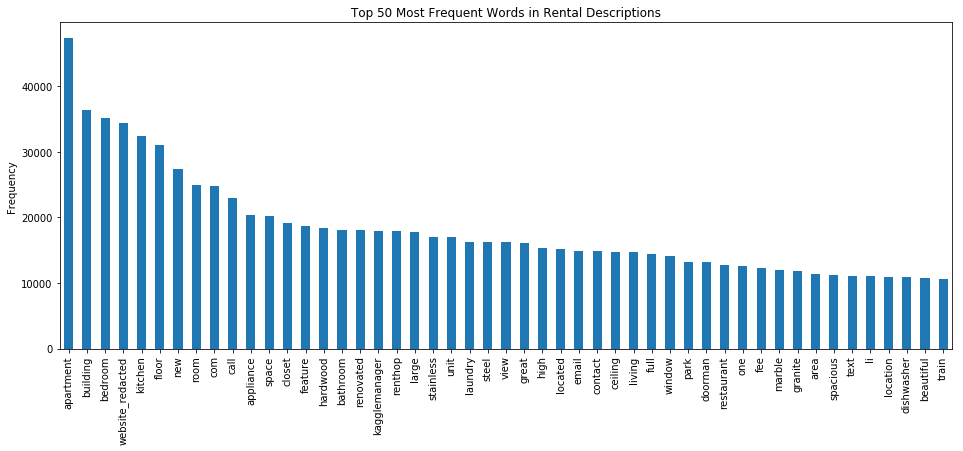

In [42]:
plt.figure(figsize=(16,6))
word_count[1:50].plot.bar() #skipping 'br' which has a count of nearly 200000 

plt.title("Top 50 Most Frequent Words in Rental Descriptions")
plt.ylabel("Frequency")
plt.show()


In [43]:
#words I think are most valuable. Will make adjustments 
my_top_words = ['appliance','renovated','stainless',
               'view','park','marble','granite',
               'train','broker','luxury','subway','storage',
               'huge','transportation','wood','prime','garage',
               'valet','sun','flex','rooftop','lobby','heat',
               'oak','photo','fireplace','air',
               'stone','playroom','security','condo','skyline',
               'island','spa','vanity']

In [44]:
#Add top words used in description to df as encoded features
for word in my_top_words:
    df[word] = np.where(df.clean_desc.str.contains(word),1,0)

In [45]:
df.shape

(48300, 70)

In [46]:
#retrain and get new score
train = df[df.index.month < 6]
test = df[df.index.month == 6]

y_train = train.pop('price')
y_test = test.pop('price')

score(train[my_top_words], test[my_top_words])

996.5266942950354

It Looks like these words have an effect, are not enough by themselves

In [47]:
#drop object columns that arent endoced
drop = ['description', 'display_address', 'street_address', 'interest_level', 'clean_desc']

train = train.drop(columns = drop)
test = test.drop(columns = drop)

In [48]:
score(train,test)

600.6583617993946

A little better but we have one more feature that can bring it down further

In [49]:
O#Add encoded interest level columns to dfs
train = pd.concat([train, interest_train], axis = 1)
test = pd.concat([test, interest_test], axis = 1)

NameError: name 'O' is not defined

In [ ]:
score(train,test)

There it is boys! I still think we can do better if we have the right subset of words to use. But there are over 20000 unique words in the description field. And the text in that field reuire more work to exrtract viable features.

##Vectorizer

I'll learn to use this at some point to get a better score

In [ ]:
#from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF
#vectorizer = TfidfVectorizer()

# Fit to sentences_no_punc and transform into array
#X = vectorizer.fit_transform(df.clean_desc)

#X = X.tocsr()

#w_train = X[:31515]
#w_test = X[31515:]

##Choose Your Words
